In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

###  Libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import torch

import os
import sys

from MLP import MLP
from Datasets.Datasets_Functions import *
from Visualization import Visualization
from Evaluations.Evaluation import Evaluator

### Global Variables

In [3]:
path_to_module = './' # 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '6'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### Visualization

In [4]:
visualization = Visualization()

### Load datasets

In [9]:
hashmap_path = path_to_module + 'Datasets/'
hashmap = get_hashmap(hashmap_path)    
print(hashmap.keys())

dataset_name = 'squeezed_gauss'
dataset_properties = hashmap[dataset_name]
print(dataset_properties)

batch_size = dataset_properties['batch_size'] #= 30
n_clusters = dataset_properties['n_clusters'] #= 3
dataloader, input_dim, data_np, labels = function_get_dataset(dataset_name, dataset_properties)

print('Data_Shape is:', input_dim)
print('Batches Number is:', len(dataloader))

dict_keys(['tcga', 'emnist_balanced_letters', 'emnist_mnist', 'emnist_balanced_digits', 'dermatology', 'ecoil', 'iris', 'rings', 'wine', 'australian', 'moons', 'squeezed_gauss', 'gauss_densities', 'pendigits', 'fashionmnist', '3dspheres', '20_newsgroups', 'coil20', 'cifar10', 'stl10', 'r15', 'r3', 'olivetti_faces'])
{'batch_size': 64, 'n_clusters': 2, 'module_name': 'Datasets.Datasets'}
Data_Shape is: 2
Batches Number is: 16


### Parameters

In [6]:
# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']
n_clusters = dataset_properties['n_clusters']

# Training Epochs and Learning Rate
lr = 1e-3
n_epochs = 50
entr_lambda = 1

kmeans_initialization = True

### Create MLP model

In [7]:
mlp = MLP(device=device, n_clusters=n_clusters, input_dim=input_dim)
mlp.set_training_variables(dataloader=dataloader, batch_size=batch_size, n_epochs=n_epochs, lr=lr, entr_lambda=entr_lambda)
mlp.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
mlp.set_path()

mlp = mlp.to(device)

### Initialize the clustering layer using k-means

In [8]:
n_inits = 10
if kmeans_initialization: mlp.kmeans_initialization(n_inits)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00


### Training the MLP

In [9]:
data, labels, clustering = mlp.train()
cluster_centers = mlp.get_clustering_layer_centers().cpu().detach().numpy()
data_dir_path = mlp.data_dir_path

Epoch: 0 Cl Loss: 15.8161 Entropy: 15.7848 Soft Sil: 0.1839 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 1 Cl Loss: 15.7557 Entropy: 15.7193 Soft Sil: 0.2443 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 2 Cl Loss: 15.6884 Entropy: 15.6293 Soft Sil: 0.3116 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 3 Cl Loss: 15.5842 Entropy: 15.5270 Soft Sil: 0.4158 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 4 Cl Loss: 15.4775 Entropy: 15.3909 Soft Sil: 0.5225 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 5 Cl Loss: 15.3482 Entropy: 15.2336 Soft Sil: 0.6518 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 6 Cl Loss: 15.2178 Entropy: 15.0572 Soft Sil: 0.7822 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 7 Cl Loss: 15.0417 Entropy: 14.8479 Soft Sil: 0.9583 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI: 0.00 ARI: -0.00
Epoch: 8 Cl Loss: 14.8815 Entropy: 14.6382 Soft Sil: 1.1185 SIL: 0.0000 ACC: 0.50 PUR: 0.50 NMI:

### $k$-means evaluation

In [10]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
evaluator = Evaluator()
evaluator.evaluate_model(data, labels, kmeans.labels_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


(0.505, 0.505, 7.218348976746638e-05, -0.0009014184005145232, 0)

Directory './Results/squeezed_gauss/MLP/50_Eps_out_2_bs_64_lr_0.001_entr_lambda_1/Experiments/No_TSNE' already exists.


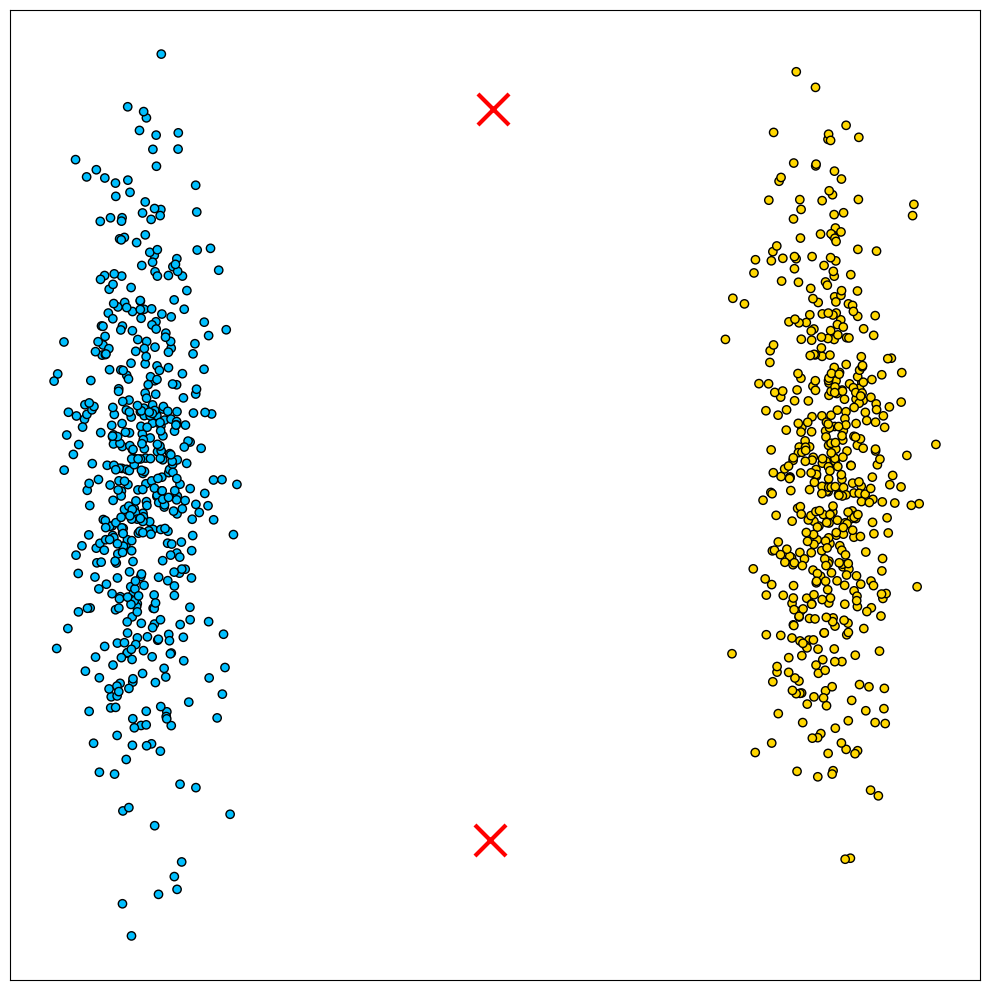

In [11]:
visualization.plot(data, labels, clustering, cluster_centers, mlp.data_dir_path)

In [12]:
#visualization.makeExcel()
#visualization.plot_tsne(mlp=True)